# Imports

In [1]:
import networkx as nx

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (15, 10)

# Résolution problème de plus court chemin

In [5]:
g = nx.DiGraph()

In [6]:
g.add_nodes_from("ABCDEF")

In [7]:
g.add_weighted_edges_from(
    [
        ("A", "B", 8),
        ("A", "E", 3),
        ("B", "A", 7),
        ("B", "C", 7),
        ("B", "F", 10),
        ("C", "B", 6),
        ("C", "D", 3),
        ("D", "A", 12),
        ("D", "F", 3),
        ("E", "B", 6),
        ("E", "D", 11),
        ("F", "C", 1),
        ("F", "E", 11),
    ],
    weight="poids"
)

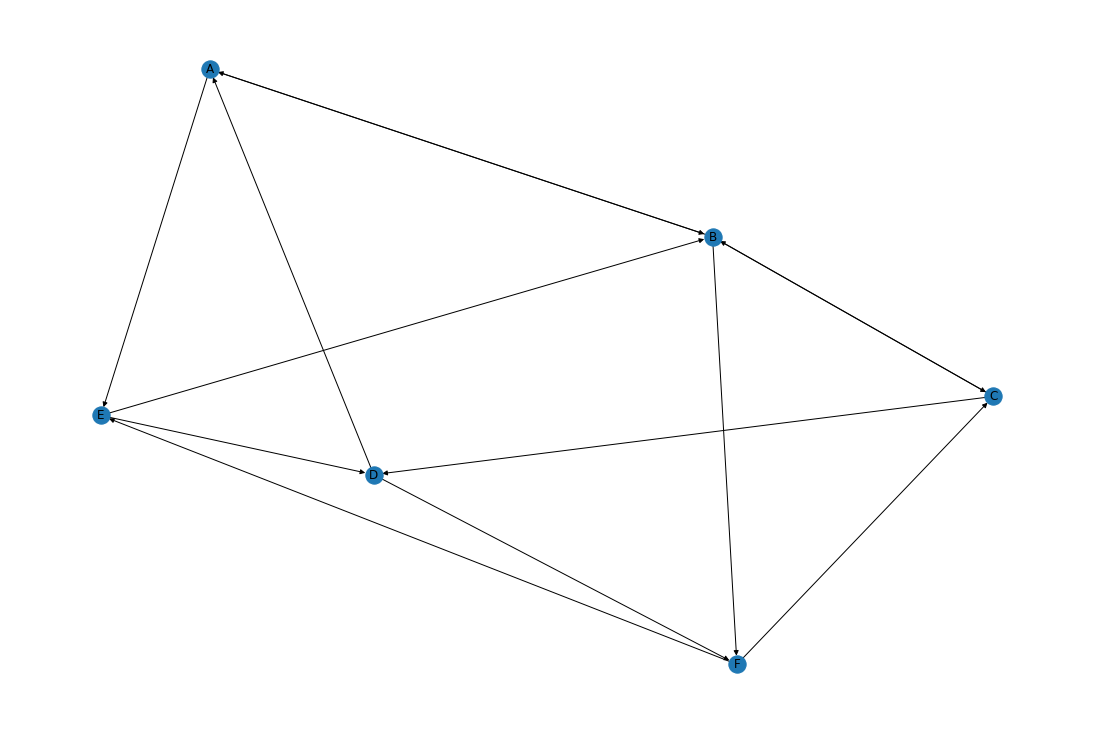

In [8]:
nx.draw(g, with_labels=True)

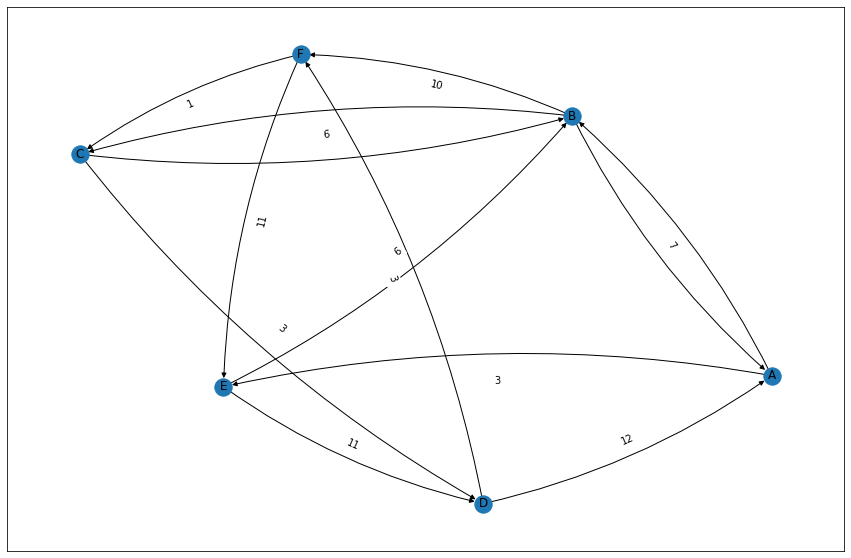

In [9]:
positions = nx.spring_layout(g, weight="poids")
nx.draw_networkx(g, pos=positions, connectionstyle='arc3, rad=0.1')
arretes = nx.get_edge_attributes(g, "poids")
dico = nx.draw_networkx_edge_labels(g, positions, edge_labels=arretes, connectionstyle='arc3, rad=0.1')

In [10]:
print(nx.dijkstra_path_length(g, "A", "F", weight="poids"))
print(nx.dijkstra_path(g, "A", "F", weight="poids"))

17
['A', 'E', 'D', 'F']


In [11]:
for resultat in nx.algorithms.all_pairs_dijkstra_path_length(g, weight="poids"):
    print(resultat)

('A', {'A': 0, 'E': 3, 'B': 8, 'D': 14, 'C': 15, 'F': 17})
('B', {'B': 0, 'A': 7, 'C': 7, 'F': 10, 'E': 10, 'D': 10})
('C', {'C': 0, 'D': 3, 'B': 6, 'F': 6, 'A': 13, 'E': 16})
('D', {'D': 0, 'F': 3, 'C': 4, 'B': 10, 'A': 12, 'E': 14})
('E', {'E': 0, 'B': 6, 'D': 11, 'A': 13, 'C': 13, 'F': 14})
('F', {'F': 0, 'C': 1, 'D': 4, 'B': 7, 'E': 11, 'A': 14})


In [12]:
for depart in g.nodes:
    for arrivee in g.nodes:
        print(
            f"{depart}, {arrivee} : ", 
            nx.dijkstra_path_length(
                g, 
                depart, 
                arrivee, 
                weight="poids"
            )
        )

A, A :  0
A, B :  8
A, C :  15
A, D :  14
A, E :  3
A, F :  17
B, A :  7
B, B :  0
B, C :  7
B, D :  10
B, E :  10
B, F :  10
C, A :  13
C, B :  6
C, C :  0
C, D :  3
C, E :  16
C, F :  6
D, A :  12
D, B :  10
D, C :  4
D, D :  0
D, E :  14
D, F :  3
E, A :  13
E, B :  6
E, C :  13
E, D :  11
E, E :  0
E, F :  14
F, A :  14
F, B :  7
F, C :  1
F, D :  4
F, E :  11
F, F :  0
